In [61]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [63]:
%%time

rf_clf.fit(X_train, y_train)

CPU times: user 21.3 s, sys: 141 ms, total: 21.4 s
Wall time: 21.5 s


RandomForestClassifier()

In [64]:
from sklearn.metrics import accuracy_score

rf_pred = rf_clf.predict(X_test)
accuracy_score(rf_pred, y_test)

0.9725

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [66]:
%%time

rf_clf.fit(X_train_pca, y_train)

CPU times: user 1min 3s, sys: 225 ms, total: 1min 3s
Wall time: 1min 3s


RandomForestClassifier()

In [67]:
X_test_pca = pca.transform(X_test)
rf_pred = rf_clf.predict(X_test_pca)
accuracy_score(rf_pred, y_test)

0.9477

Reduce the dateset to two dimensions and plot a scatter plot

In [32]:
from sklearn.manifold import TSNE

X_plot = TSNE().fit_transform(X)

/Users/briansteven1711/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/briansteven1711/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


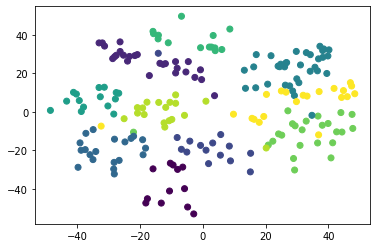

In [58]:
import matplotlib.pyplot as plt
import numpy as np

colors = [int(x) for x in y[::350]]
x_axis = X_plot[::350, 0]
y_axis = X_plot[::350, 1]

plt.scatter(x_axis, y_axis, c=colors)
plt.show()

In [59]:
X_plot_pca = PCA(n_components=2).fit_transform(X)

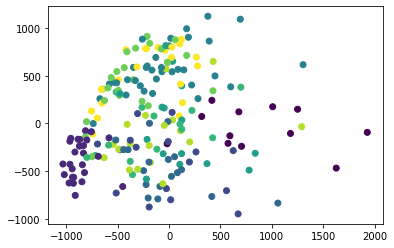

In [60]:
colors = [int(x) for x in y[::350]]
x_axis = X_plot_pca[::350, 0]
y_axis = X_plot_pca[::350, 1]

plt.scatter(x_axis, y_axis, c=colors)
plt.show()